# Project: Investigate a Dataset (TMDb-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project analyzes a dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, revenue, budget, and many other variables.
In this project, I tried to answer some questions

1- Are the new movies more interested and have high ratings than old ones?

2- Has a high budget an effect on the movie's rating?

3- Have got high rated movies high revenue also?

4- Are all the movies with high rating popular?

5- What is the distribution of the movies' genres across the data?

In [1]:
#import statements for all of the packages that will be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#load dataset
movies = pd.read_csv('tmdb-movies.csv')

# Assessing Data

1- IDs are int but imdb_id is object

2- Release_year type is int instead date

3- Budget_adj and revenue_adj, name of columns aren't clear enough

4- Usless columns in the analysis (homepage, keywords, overview)

5- Dataset contain a duplicated row

6- Many cells have the value zero instead of nan


In [3]:
movies.shape
#Dataset contains more than 10,000 movies.

(10866, 21)

In [4]:
#Displaying the first 5 rows of the dataset, to have a general look at the data.
movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#Displaying a random sample of the dataset.
movies.sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8911,11704,tt0084649,0.555585,7000000,14665733,The Secret of NIMH,Derek Jacobi|Elizabeth Hartman|Arthur Malet|Do...,NaN,Don Bluth,Right before your eyes and beyond your wildest...,...,A widowed field mouse must move her family -- ...,82,Fantasy|Animation|Drama|Family,Metro-Goldwyn-Mayer (MGM),6/17/82,80,7.3,1982,1.581750e+07,3.313931e+07
2633,120,tt0120737,8.575419,93000000,871368364,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.lordoftherings.net/,Peter Jackson,One ring to rule them all,...,"Young hobbit Frodo Baggins, after inheriting a...",178,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|The Saul Zaentz ...,12/18/01,6079,7.8,2001,1.145284e+08,1.073080e+09
7001,14442,tt0327679,1.473411,31000000,27388767,Ella Enchanted,Anne Hathaway|Hugh Dancy|Cary Elwes|Aidan McAr...,NaN,Tommy O'Haver,Get enchanted,...,"Ella of Frell is given the ""gift of obedience""...",96,Fantasy|Comedy|Family|Romance,Miramax Films,4/9/04,238,5.7,2004,3.578781e+07,3.161884e+07
7052,205,tt0395169,0.787185,17500000,38000000,Hotel Rwanda,Don Cheadle|Sophie Okonedo|Nick Nolte|Fana Mok...,http://www.metrofilms.com/hotelrwanda/,Terry George,"When the world closed its eyes, he opened his ...",...,"Inspired by true events, this film takes place...",121,Drama|History|War,Lions Gate Films|United Artists|Industrial Dev...,9/11/04,456,7.2,2004,2.020279e+07,4.386893e+07
9158,15043,tt0162212,0.146100,0,0,Brink!,Erik von Detten|Sam Horrigan|Christina Vidal|R...,NaN,Greg Beeman,It Takes A Champ To Stay In Line.,...,"Andy ""Brink"" Brinker and his in-line skating c...",99,Drama,Brink Productions,8/28/98,15,5.9,1998,0.000000e+00,0.000000e+00
1213,263510,tt2611026,0.110266,0,0,The Hornet's Nest,Carlos Boettcher|Mike Boettcher|Kalen M. Waite,NaN,David Salzberg|Christian Tureaud,"Real War, Real Heroes",...,"Armed only with their cameras, Peabody and Emm...",93,War|Documentary|History,HighRoad Entertainment,5/9/14,16,6.5,2014,0.000000e+00,0.000000e+00
7305,24571,tt0068339,0.069248,0,0,Carry On Matron,Sid James|Kenneth Williams|Charles Hawtrey|Joa...,NaN,Gerald Thomas,The Carry On team serve up another 'prescripti...,...,A gang of thieves plan to make their fortune b...,87,Comedy,The Rank Organisation,5/5/72,10,5.8,1972,0.000000e+00,0.000000e+00
1377,20416,tt0075925,0.112001,0,0,The Deep,Robert Shaw|Jacqueline Bisset|Nick Nolte|Louis...,NaN,Peter Yates,Is anything worth the terror of ... The Deep.,...,A pair of young vacationers are involved in a ...,123,Mystery|Thriller|Adventure,EMI Films Ltd.|Casablanca Filmworks,6/17/77,27,5.7,1977,0.000000e+00,0.000000e+00
3077,10188,tt1018785,0.451304,27000000,44352417,The Sisterhood of the Traveling Pants 2,Alexis Bledel|Amber Tamblyn|America Ferrera|Bl...,NaN,Sanaa Hamri,Some friends just fit together.,...,Four young women continue the journey toward a...,117,Adventure|Comedy|Drama|Family,NaN,8/6/08,127,6.0,2008,2.734524e+07,4.491954e+07
7775,24632,tt0848552,0.117819,0,0,The Mad,Billy Zane|Maggie Castle|Jordan Madley|Shauna ...,NaN,John Kalangis,NaN,...,A horror-thriller in which a doctor and his te...,83,Comedy|Horror|Thriller,23/5 Filmproduktion,5/22/07,11,6.3,2007,0.000000e+00,0.000000e+00


The above sample shows

1- There is too much missing data represented by NaN

2- There is missing data represented by zero(0)

In [6]:
#To check the type of each column and to have a general idea, which columns have missing data?
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Previous function shows

1- imdb_id is (object), on the other hand id is (int).

2- release_date is object but it is a date.

In [7]:
#displaying the columns
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

1- Data contains unnecessary columns for the analysis (homepage, tagline, keywords, overview), need to be deleted in the cleaning phase.

2- 'release_year', 'budget_adj' = unclear column's name >> rename in cleaning phase

In [8]:
#statistics about the data
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
#How many duplicated rows in the dataset?
sum(movies.duplicated())

1

Data has one duplicated row, needs to be dropped in the cleaning phase.

In [10]:
#Check by coding whether data has null values or not.
movies.isnull().sum().any()

True

In [11]:
#which columns contain null values?
movies.columns[movies.isnull().any()].tolist()

['imdb_id',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'genres',
 'production_companies']

homepage, tagline, keywords, and overview are already unnecessary in the analysis and need to be dropped in the cleaning phase.

Genres is a very important column, we need to count how many missing values in it. 

In [12]:
#How many nan in the 'genres' column?
sum(movies.genres.isnull())

23

fortunately, we don't have too missing data in the genres column, but unfortunately, we couldn't fill these missing values, as we don't have the original data to extract these missing data. 

In [13]:
#Counting cells with missing values:
sum([True for idx,row in movies.iterrows() if any(row.isnull())])

8874

In [14]:
#range of the relase year
movies.release_year.value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

### Data Cleaning 

Make a copy of the dataset to clean it

In [15]:
movies_clean = movies.copy()

In [16]:
#displaying the columns in the clean function
movies_clean.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

1- Convert the type of id from int to string, as it will not be included in any calculations

In [17]:
movies_clean.id = movies_clean.id.astype('str')

In [18]:
#Test the previous code.
movies_clean.dtypes

id                       object
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

2- Convert (release_year) to date type 

In [19]:
movies_clean['release_date'] = pd.to_datetime(movies_clean['release_date'])

In [20]:
#Test the previous Code
movies_clean.dtypes

id                              object
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

3- Rename budget_adj and revenue_adj

In [21]:
movies_clean = movies_clean.rename(columns={"budget_adj": "budget_in_terms_of_2010_dollars"})
movies_clean = movies_clean.rename(columns={"revenue_adj": "revenue_in_terms_of_2010_dollars"})

In [22]:
#Test the previous code
movies_clean.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year',
       'budget_in_terms_of_2010_dollars', 'revenue_in_terms_of_2010_dollars'],
      dtype='object')

4- Drop columns not required further for the analysis
 (homepage, keywords, overview, tagline)

In [23]:
movies_clean.drop(['homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace = True)

In [24]:
#Test the previous code
movies_clean.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_in_terms_of_2010_dollars', 'revenue_in_terms_of_2010_dollars'],
      dtype='object')

5- Delete the duplicated row

In [25]:
#Displaying the duplicated row.
duplicate = movies_clean[movies_clean.duplicated()] 
duplicate

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_in_terms_of_2010_dollars,revenue_in_terms_of_2010_dollars
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [26]:
#Drop the duplicated row
movies_clean.drop_duplicates(inplace=True)

In [27]:
#Test the previous code
sum(movies_clean.duplicated())

0

6- replace zeros values with nan 

In [28]:
movies_clean = movies_clean.replace(0, np.nan)

In [29]:
#counting number of missing data in the cells
#It is clear that the number increased, that is an indicator that we have replaced zeros successfully
sum([True for idx,row in movies_clean.iterrows() if any(row.isnull())])

7060

In [30]:
#List of columns that have null values after cleaning.
movies_clean.columns[movies_clean.isnull().any()].tolist()

['imdb_id',
 'budget',
 'revenue',
 'cast',
 'director',
 'runtime',
 'genres',
 'production_companies',
 'budget_in_terms_of_2010_dollars',
 'revenue_in_terms_of_2010_dollars']

This cleaning step shows that the budget column and revenue column have a missing value.

As both columns are important we need to count the number of missing data within both columns.

In [31]:
#counting number of nulls in budget_in_terms_of_2010_dollars column
sum(movies_clean.budget_in_terms_of_2010_dollars.isnull())

5696

In [32]:
##counting number of nulls in revenue_in_terms_of_2010_dollars column
sum(movies_clean.revenue_in_terms_of_2010_dollars.isnull())

6016

Drop all the rows that have NaN values either in budget_in_terms_of_2010_dollars column or revenue_in_terms_of_2010_dollars column and creating a new data frame

This data frame will be helpful for our analysis later. 

In [33]:
budget_revenue_df = movies_clean.dropna(subset=['budget_in_terms_of_2010_dollars'], how='all')

In [34]:
#Test the dropping function to make sure that df clean now
sum(budget_revenue_df.budget_in_terms_of_2010_dollars.isnull())

0

In [35]:
#Drop rows have NaN value in revenue_in_terms_of_2010_dollars
budget_revenue_df = budget_revenue_df.dropna(subset=['revenue_in_terms_of_2010_dollars'], how='all')

In [36]:
#Test the df
sum(budget_revenue_df.revenue_in_terms_of_2010_dollars.isnull())

0

In [37]:
#Displaying the shape of the new df
budget_revenue_df.shape

(3854, 17)

In [38]:
#creating a new column called 'profits' to use it for the further analysis
budget_revenue_df['profits'] = budget_revenue_df['revenue_in_terms_of_2010_dollars'] - budget_revenue_df['budget_in_terms_of_2010_dollars']

In [39]:
#Test the previous code
budget_revenue_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_in_terms_of_2010_dollars', 'revenue_in_terms_of_2010_dollars',
       'profits'],
      dtype='object')

In [40]:
#displaying the head of budget_revenue_df
budget_revenue_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_in_terms_of_2010_dollars,revenue_in_terms_of_2010_dollars,profits
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [41]:
#Check the competence of the dataset in the budget_revenue_df
budget_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 18 columns):
id                                  3854 non-null object
imdb_id                             3854 non-null object
popularity                          3854 non-null float64
budget                              3854 non-null float64
revenue                             3854 non-null float64
original_title                      3854 non-null object
cast                                3850 non-null object
director                            3853 non-null object
runtime                             3854 non-null float64
genres                              3854 non-null object
production_companies                3808 non-null object
release_date                        3854 non-null datetime64[ns]
vote_count                          3854 non-null int64
vote_average                        3854 non-null float64
release_year                        3854 non-null int64
budget_in_terms_of_2010_do

In [42]:
#Displaying the profits with negative values
budget_revenue_df.loc[budget_revenue_df['profits']<= 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_in_terms_of_2010_dollars,revenue_in_terms_of_2010_dollars,profits
57,210860,tt3045616,2.575711,60000000.0,30418560.0,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,106.0,Comedy|Adventure,Lionsgate|Mad Chance|OddLot Entertainment|Huay...,2015-01-21,696,5.3,2015,5.519998e+07,2.798506e+07,-2.721491e+07
59,201088,tt2717822,2.550747,70000000.0,17752940.0,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,133.0,Mystery|Crime|Action|Thriller|Drama,Universal Pictures|Forward Pass|Legendary Pict...,2015-01-13,584,5.0,2015,6.439997e+07,1.633270e+07,-4.806727e+07
66,205775,tt1390411,2.345821,100000000.0,93820758.0,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,122.0,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,2015-11-20,805,6.4,2015,9.199996e+07,8.631506e+07,-5.684900e+06
73,266647,tt3332064,2.234573,150000000.0,128388320.0,Pan,Levi Miller|Garrett Hedlund|Hugh Jackman|Roone...,Joe Wright,111.0,Adventure|Family|Fantasy,Warner Bros.|Moving Picture Company (MPC)|Berl...,2015-09-24,586,5.9,2015,1.379999e+08,1.181172e+08,-1.988274e+07
84,290764,tt2401097,2.026651,11000000.0,1863315.0,Tracers,Marie Avgeropoulos|Taylor Lautner|Adam Rayner|...,Daniel Benmayor,94.0,Action|Crime|Drama,Temple Hill Entertainment|Senator Film|Freerun...,2015-01-15,326,5.9,2015,1.012000e+07,1.714249e+06,-8.405747e+06
87,287424,tt1881002,1.980039,4000000.0,187112.0,Maggie,Arnold Schwarzenegger|Abigail Breslin|Joely Ri...,Henry Hobson,95.0,Horror,Lionsgate|Grindstone Entertainment Group|Silve...,2015-05-08,384,5.1,2015,3.679998e+06,1.721430e+05,-3.507855e+06
89,181283,tt1014763,1.956320,50000000.0,3324330.0,Child 44,Tom Hardy|Gary Oldman|Noomi Rapace|Joel Kinnam...,Daniel Espinosa,137.0,Crime|Thriller,Summit Entertainment|Scott Free Productions|Wo...,2015-03-15,341,5.9,2015,4.599998e+07,3.058382e+06,-4.294160e+07
106,273477,tt1727776,1.499614,15000000.0,14860766.0,Scouts Guide to the Zombie Apocalypse,Tye Sheridan|Logan Miller|Joey Morgan|Sarah Du...,Christopher B. Landon,93.0,Comedy|Horror,Paramount Pictures|Oops Doughnuts Productions|...,2015-10-23,288,6.2,2015,1.379999e+07,1.367190e+07,-1.280952e+05
109,336004,tt3276924,1.449072,8900000.0,50136.0,Heist,Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...,Scott Mann,93.0,Crime|Action|Thriller,Emmett/Furla Films|Silver Plane Films|Mass Hys...,2015-11-13,233,5.4,2015,8.187996e+06,4.612510e+04,-8.141871e+06
111,182560,tt2402101,1.443406,20000000.0,208588.0,Dark Places,Charlize Theron|Nicholas Hoult|Christina Hendr...,Gilles Paquet-Brenner,113.0,Drama|Mystery|Thriller,Denver and Delilah Productions|Mandalay Vision...,2015-03-31,322,5.7,2015,1.839999e+07,1.919009e+05,-1.820809e+07


I prefer to keep the two dataframes and use both in the exploratory step

1- movies_clean

This dataframe has clean data but it includes too much missing data especially in the budget and revenue column.

But it has many valuable data such as average rating, vote counts, and popularity. I don't want to lose all this valuable data and use it further in the analysis

2-budget_revenue_df

This dataframe has clean data and almost complete data

But unfortunately, we lose 7012 rows, which have many valuable data also.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1- Are the new movies more interested and have high ratings than old ones?


Text(0.5,1,'fig(1) Distribution of ratings across the years')

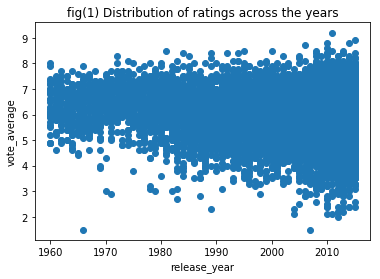

In [43]:
#plotting release_year vs vote_average to check the distribution of the average vote across the years
plt.scatter(data = movies_clean, x = 'release_year', y = 'vote_average');
plt.xlabel('release_year')
plt.ylabel('vote_average')
plt.title('fig(1) Distribution of ratings across the years')

Figure(1) shows that the new movies have a wide range of ratings in addition to that the highest ratings are for the newest movies. 

<function matplotlib.pyplot.show(*args, **kw)>

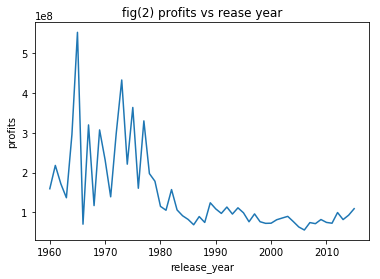

In [44]:
#plotting line plot to check wether the profits increase across the years or not 
plt.plot(budget_revenue_df.groupby('release_year')['profits'].mean())
plt.xlabel('release_year')
plt.ylabel('profits')
plt.title('fig(2) profits vs rease year')
plt.show

In [45]:
#top profit
top_profits_df = budget_revenue_df.nlargest(5,'profits').sort_values(by='profits', ascending=False)
top_profits_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_in_terms_of_2010_dollars,revenue_in_terms_of_2010_dollars,profits
1329,11,tt0076759,12.037933,11000000.0,7.753980e+08,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
1386,19995,tt0499549,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
5231,597,tt0120338,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09
10594,9552,tt0070047,2.010733,8000000.0,4.413061e+08,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122.0,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973-12-26,1113,7.2,1973,3.928928e+07,2.167325e+09,2.128036e+09
9806,578,tt0073195,2.563191,7000000.0,4.706540e+08,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124.0,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.3,1975,2.836275e+07,1.907006e+09,1.878643e+09


fig(2) shows many peaks in the graph between 1960 and 1980.

The highest profit is for 'Star Wars' movie, which released in 1977. 

Text(0.5,1,'fig(3) most frequent years across the data')

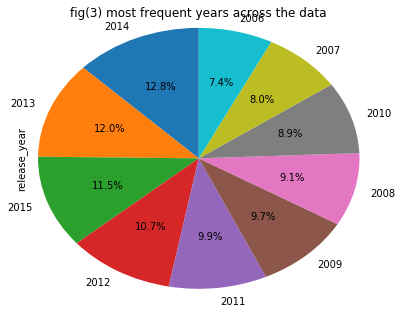

In [46]:
#plotting the distribution of the release years. The graph shows only the most frequent 10 release years across the data.

labels = np.full(len(movies_clean.release_year.value_counts()), "", dtype=object)
labels[0] = 'ASAP'
movies_clean['release_year'].value_counts().nlargest(10).plot(kind="pie", startangle=90, autopct='%.1f%%', radius=1.2, figsize=(6, 5))
plt.title('fig(3) most frequent years across the data')

Text(0.5,1,'fig(4) least frequent years across the data')

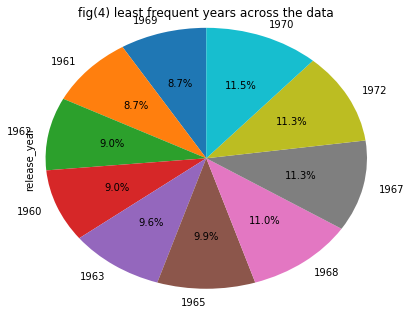

In [47]:
#plotting the distribution of the release years. The graph shows only the lowest frequency 10 release years across the data.

labels = np.full(len(movies_clean.release_year.value_counts()), "", dtype=object)
labels[0] = 'ASAP'
movies_clean['release_year'].value_counts().nsmallest(10).plot(kind="pie", startangle=90, autopct='%.1f%%', radius=1.2, figsize=(6, 5))
plt.title('fig(4) least frequent years across the data')

Figure 3 and 4 show the distribution of the release years' counts across the data:

1- The majority of the movies released between 2008 until 2010.

2- The least number of movies released between 1960 until 1972.

Although the newest movies have a higher rating but the old ones have a high profits.

we couldn't conclude which movies are more interested for the audience, because the distribution of the movies in the data isn't equal across the years.

In the past, we have a very low number of released movies, so one successful movie can make a great peak, but nowadays we have a lot of successful movies and a lot of unsuccessful movies and the average profits for both represented in figure 2.

### Research Question 2  (2- Has a high budget an effect on the movie's rating?)

<function matplotlib.pyplot.show(*args, **kw)>

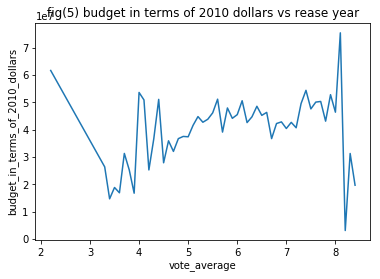

In [48]:
#plotting a line graph (vote_average vs the budget )
plt.plot(budget_revenue_df.groupby('vote_average')['budget_in_terms_of_2010_dollars'].mean())
plt.xlabel('vote_average')
plt.ylabel('budget_in_terms_of_2010_dollars')
plt.title('fig(5) budget in terms of 2010 dollars vs rease year')
plt.show

In [49]:
#top highest budget
top_budget_df = budget_revenue_df.nlargest(5,'budget_in_terms_of_2010_dollars').sort_values(by='budget_in_terms_of_2010_dollars', ascending=False)
top_budget_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_in_terms_of_2010_dollars,revenue_in_terms_of_2010_dollars,profits
2244,46528,tt1032751,0.250540,425000000.0,1.108757e+07,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07,-4.139124e+08
3375,1865,tt1298650,4.955130,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136.0,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011,3.683713e+08,9.904175e+08,6.220462e+08
7387,285,tt0449088,4.965391,300000000.0,9.610000e+08,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169.0,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,2626,6.8,2007,3.155006e+08,1.010654e+09,6.951529e+08
6570,1452,tt0348150,1.957331,270000000.0,3.910812e+08,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154.0,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,2006-06-28,834,5.3,2006,2.920507e+08,4.230205e+08,1.309698e+08
5231,597,tt0120338,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09


figure 5: There is a direct proportion between the budget of the movie and the average ratings

The line of the graph shows too many peaks and drops. it isn't necessary, that Movies with a high budget get high ratings. 
movies with the highest 5 budgets in the data having an average rating from 5.3 to 7.3

The highest budgent in the data is for 'The Warrior's Way' movie.

### Research Question 3  (3- Have got high rated movies high profits also?)

<function matplotlib.pyplot.show(*args, **kw)>

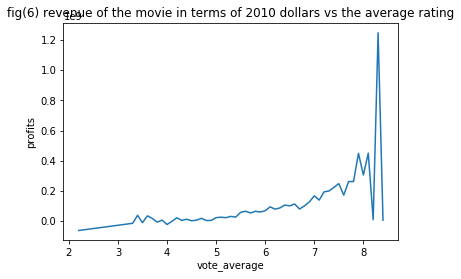

In [50]:
plt.plot(budget_revenue_df.groupby('vote_average')['profits'].mean())
plt.title('fig(6) revenue of the movie in terms of 2010 dollars vs the average rating')
plt.xlabel('vote_average')
plt.ylabel('profits')
plt.show

Figure (6) shows a direct proportion between the profits of the movie and the average ratings. Movies with a high rating get high profits.

### Research Question 4  (4- Are all the movies with high rating popular?)


Text(0.5,1,'fig(7) popularity of the movies vs the average ratings')

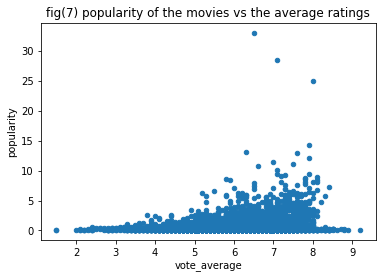

In [51]:
#popularity vs average votting
movies_clean.plot(y='popularity', x='vote_average', kind='scatter');
plt.title('fig(7) popularity of the movies vs the average ratings')

In [52]:
#displaying the lowest vote counts
movies_clean.groupby('vote_average')['vote_count'].mean().nsmallest(20).sort_values(ascending=True)

vote_average
8.6    10.000000
8.9    11.000000
1.5    12.500000
2.0    13.000000
2.4    13.142857
2.8    13.857143
9.2    14.000000
2.2    14.333333
2.3    15.000000
3.0    15.100000
2.6    17.666667
2.7    17.666667
2.9    17.888889
3.2    18.888889
3.6    18.931034
2.1    19.333333
3.5    19.806452
3.3    22.181818
3.7    22.473684
8.7    23.000000
Name: vote_count, dtype: float64

Figure 6 shows an increase in the average ratings with increasing in the popularity of the movie. Movies with ratings greater than 8.5 show decreasing in popularity, as well as vote average.

### Research Question 5  (5- what is the favorite genres for the audience?)


Text(0.5,1,"fig(7) Distribution of the movie's genres")

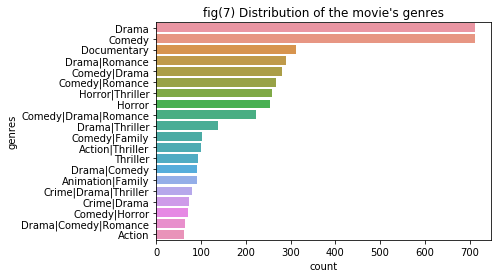

In [53]:
type_order = movies_clean['genres'].value_counts().nlargest(20).index
sb.countplot(data=movies_clean, y='genres', order=type_order);
plt.title('fig(7) Distribution of the movie\'s genres')

Figure 7 shows the most frequent movies' genres across the data. Drama and comedy get the first place followed by the documentary.

<a id='conclusions'></a>
## Conclusions

Data consist of more than 10,000 data about movies, according to TMDb. The dataset shows a wide range of movies from 1960 until 2010, but it is unfortunately not equally distributed. 

The number of released movies across the years plays a great role in our analysis. For example, data contains 700 movies released in 2010, on the other hand only 31 in 1961. Maybe that is because of increasing the number of produced movies nowadays in comparison to the past. So we couldn't conclude whether the old movies are more interested or not depending only on the mean of average ratings for those not equally distributed movies.

Interestingly, we have revenue and the budget of the movies in terms of 2010 dollars to be able to make a comparison between the movies. 
it isn't necessary, that Movies with a high budget get high ratings. 
movies with the highest 5 budgets in the data get an average rating from 5.3 to 7.3, but  Movies with a high rating get high profits.

Data shows an increase in the average ratings with increasing in the popularity of the movie. popularity and vote counts have by logic a strong relation. There is a drop in the popularity of the movies with ratings greater than 8.5.

Interestingly, Drama and comedy movies are equally distributed across the data. That gives us an idea about the most produced movies across the years.


limitations:


-Unfortunately, there is too much missing data about the budget and revenue. So we couldn't depend a hundred percent on the results that related to budget or revenue. Especially with decreasing the number of movies in the past. I decided not to drop these movies, because they include many other useful data as popularity, vote counts, and vote average. For this reason, I depend on two dataframes in my analysis

-Missing the country of the movie plays a great role. It is not fair to make a comparison between two different movies produced in two different cultures to the art and both of them have been produced in two different financial situations.
. 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0